In [142]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [143]:
voice_usage_info = pd.read_csv("data/VOICE_OUTGOING_CALL_USAGE_OFFNET.csv")

voice_usage_info

,event_source,event_source.hash,call_count,duration (seconds),year month,account_num,account_num.hash,rtom_code,location_code,msan,equp_id,equp_index
0,542240120,90feabe2f2846cbf4eb77db650c48a1b,14,1200,201912,0019467547,9c926ad1c6705e1f46462dc5b59d8feb,R-GP,TP-NODE,C300M,870091,1
1,542240244,4c31c59c555ac6f4fdba3cec18674004,186,29616,202001,0002769147,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
2,542240244,4c31c59c555ac6f4fdba3cec18674004,162,28799,202002,0002769147,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
3,542240244,4c31c59c555ac6f4fdba3cec18674004,187,34830,202003,0002769147,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
4,542240244,4c31c59c555ac6f4fdba3cec18674004,116,27311,202005,0002769147,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33207,552273668,881083811a88758606701519d3f07faa,12,389,202006,0003944938,c78977b555bf659a9586b15dd4f3b608,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33208,552273669,ac8d17782113fb666dc8d8804f46ceaa,8,1560,201908,000394494X,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33209,552273669,ac8d17782113fb666dc8d8804f46ceaa,8,2100,201909,000394494X,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33210,552273669,ac8d17782113fb666dc8d8804f46ceaa,15,4020,202001,000394494X,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1


In [144]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Upload/Downlad/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [145]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source.hash","year month"], keep="last")

voice_usage_info.shape

(33200, 12)

In [146]:
voice_usage_info = voice_usage_info.drop(['event_source','account_num'], axis=1)
voice_usage_info.rename(columns={'duration (seconds)': 'duration','year month':'year-month'}, inplace=True)
voice_usage_info

,event_source.hash,call_count,duration,year-month,account_num.hash,rtom_code,location_code,msan,equp_id,equp_index
0,90feabe2f2846cbf4eb77db650c48a1b,14,1200,201912,9c926ad1c6705e1f46462dc5b59d8feb,R-GP,TP-NODE,C300M,870091,1
1,4c31c59c555ac6f4fdba3cec18674004,186,29616,202001,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
2,4c31c59c555ac6f4fdba3cec18674004,162,28799,202002,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
3,4c31c59c555ac6f4fdba3cec18674004,187,34830,202003,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
4,4c31c59c555ac6f4fdba3cec18674004,116,27311,202005,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1
...,...,...,...,...,...,...,...,...,...,...
33207,881083811a88758606701519d3f07faa,12,389,202006,c78977b555bf659a9586b15dd4f3b608,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33208,ac8d17782113fb666dc8d8804f46ceaa,8,1560,201908,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33209,ac8d17782113fb666dc8d8804f46ceaa,8,2100,201909,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1
33210,ac8d17782113fb666dc8d8804f46ceaa,15,4020,202001,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1


In [147]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0         14
1        186
2        162
3        187
4        116
        ... 
33207     12
33208      8
33209      8
33210     15
33211      4
Name: call_count, Length: 33200, dtype: int64

In [148]:
voice_usage_info.isnull().sum(axis=0)

event_source.hash    0
call_count           0
duration             0
year-month           0
account_num.hash     0
rtom_code            0
location_code        0
msan                 0
equp_id              0
equp_index           0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [149]:
voice_usage = voice_usage_info[['event_source.hash','account_num.hash','call_count','duration','year-month']]
voice_usage


,event_source.hash,account_num.hash,call_count,duration,year-month
0,90feabe2f2846cbf4eb77db650c48a1b,9c926ad1c6705e1f46462dc5b59d8feb,14,1200,201912
1,4c31c59c555ac6f4fdba3cec18674004,b0c495cfe7a57adf77d0fdadecabe3e0,186,29616,202001
2,4c31c59c555ac6f4fdba3cec18674004,b0c495cfe7a57adf77d0fdadecabe3e0,162,28799,202002
3,4c31c59c555ac6f4fdba3cec18674004,b0c495cfe7a57adf77d0fdadecabe3e0,187,34830,202003
4,4c31c59c555ac6f4fdba3cec18674004,b0c495cfe7a57adf77d0fdadecabe3e0,116,27311,202005
...,...,...,...,...,...
33207,881083811a88758606701519d3f07faa,c78977b555bf659a9586b15dd4f3b608,12,389,202006
33208,ac8d17782113fb666dc8d8804f46ceaa,cfc0dd04946fe2779e63e51c7a3aa0c2,8,1560,201908
33209,ac8d17782113fb666dc8d8804f46ceaa,cfc0dd04946fe2779e63e51c7a3aa0c2,8,2100,201909
33210,ac8d17782113fb666dc8d8804f46ceaa,cfc0dd04946fe2779e63e51c7a3aa0c2,15,4020,202001


In [150]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                              \
year-month                           201908 201909 201910 201911 201912   
event_source.hash                                                         
00221451f705ebe26051158bb14f567a         43      6     24      7     22   
002fb47f60400713c854b0f69ff78c0a         12      1      8      6     14   
00567a4a3c474aca1ce5cd6570648932         10      0      0      0      2   
00724ae2470df1ed0fe919800d02517d          0      0      0      0      0   
007400db8afa996e788d23986739f3db         30     40     27     18     29   
...                                     ...    ...    ...    ...    ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2          0     13     15     15      1   
ffb63ff99cf1354dff1da862f379da80         99    156    143    154     73   
ffd697d66cc01c8897ce3e37d693673a          1      0      0      0      0   
ffd96f173d6cd683bf3384bdc2f99713         91     61     90     63     55   
ffee845c0caa320b55e31bb156827d16          0      2      8      0      0   

                                                                     ...  \
year-month                       202001 202002 202003 202004 202005  ...   
event_source.hash                                                    ...   
00221451f705ebe26051158bb14f567a      9      3      7      3      5  ...   
002fb47f60400713c854b0f69ff78c0a      8     13      9     17     12  ...   
00567a4a3c474aca1ce5cd6570648932      3      0      0      0      0  ...   
00724ae2470df1ed0fe919800d02517d      0      0      0      0      0  ...   
007400db8afa996e788d23986739f3db      7     11      0      4     15  ...   
...                                 ...    ...    ...    ...    ...  ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2      0      0      1      4      0  ...   
ffb63ff99cf1354dff1da862f379da80    190    125    142     53     61  ...   
ffd697d66cc01c8897ce3e37d693673a      0      0      0      0      0  ...   
ffd96f173d6cd683bf3384bdc2f99713     56     65     59     23      3  ...   
ffee845c0caa320b55e31bb156827d16      0      1      6      3      0  ...   

                                 duration                                     \
year-month                         201911 201912 202001 202002 202003 202004   
event_source.hash                                                              
00221451f705ebe26051158bb14f567a     1181   2263    547    386   2203   1638   
002fb47f60400713c854b0f69ff78c0a      442   2861   4991   3903   3747   6419   
00567a4a3c474aca1ce5cd6570648932        0    120    180      0      0      0   
00724ae2470df1ed0fe919800d02517d        0      0      0      0      0      0   
007400db8afa996e788d23986739f3db     1380   2400    540    840      0    240   
...                                   ...    ...    ...    ...    ...    ...   
ffb4fa6778bc5b3d9c858f5f4fa1e0c2     1836   2683      0      0    346    772   
ffb63ff99cf1354dff1da862f379da80    20460  12120  23220  15960  18000   5580   
ffd697d66cc01c8897ce3e37d693673a        0      0      0      0      0      0   
ffd96f173d6cd683bf3384bdc2f99713    17210  11399  10759   9866   6796   3755   
ffee845c0caa320b55e31bb156827d16        0      0      0     60    840    300   

                                                              
year-month                       202005 202006 202007 202008  
event_source.hash                                             
00221451f705ebe26051158bb14f567a   1694   3140   2063   1550  
002fb47f60400713c854b0f69ff78c0a  10999    477    226   2081  
00567a4a3c474aca1ce5cd6570648932      0      0      0      0  
00724ae2470df1ed0fe919800d02517d      0      0      0   1140  
007400db8afa996e788d23986739f3db    960   1740      0      0  
...                                 ...    ...    ...    ...  
ffb4fa6778bc5b3d9c858f5f4fa1e0c2      0      0    303      0  
ffb63ff99cf1354dff1da862f379da80   9360  19200  38940  11580  
ffd697d66cc01c8897ce3e37d693673a      0      0      0      0  
ffd96f173d6cd683bf3384bdc2f99713    552 

In [151]:
# check for all zero cols
pivot_voice_usage_info.loc[pivot_voice_usage_info.index == 0.0]

Empty DataFrame
Columns: [(call_count, 201908), (call_count, 201909), (call_count, 201910), (call_count, 201911), (call_count, 201912), (call_count, 202001), (call_count, 202002), (call_count, 202003), (call_count, 202004), (call_count, 202005), (call_count, 202006), (call_count, 202007), (call_count, 202008), (duration, 201908), (duration, 201909), (duration, 201910), (duration, 201911), (duration, 201912), (duration, 202001), (duration, 202002), (duration, 202003), (duration, 202004), (duration, 202005), (duration, 202006), (duration, 202007), (duration, 202008)]
Index: []

[0 rows x 26 columns]

In [152]:
pivot_voice_usage_info.columns

MultiIndex([('call_count', 201908),
            ('call_count', 201909),
            ('call_count', 201910),
            ('call_count', 201911),
            ('call_count', 201912),
            ('call_count', 202001),
            ('call_count', 202002),
            ('call_count', 202003),
            ('call_count', 202004),
            ('call_count', 202005),
            ('call_count', 202006),
            ('call_count', 202007),
            ('call_count', 202008),
            (  'duration', 201908),
            (  'duration', 201909),
            (  'duration', 201910),
            (  'duration', 201911),
            (  'duration', 201912),
            (  'duration', 202001),
            (  'duration', 202002),
            (  'duration', 202003),
            (  'duration', 202004),
            (  'duration', 202005),
            (  'duration', 202006),
            (  'duration', 202007),
            (  'duration', 202008)],
           names=[None, 'year-month'])

In [153]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,call_count,duration,year-month
count,33200.00000,33200.00000,33200.00000
mean,56.20889,7295.82563,201967.88563
std,126.97360,15862.24739,46.07265
min,1.00000,1.00000,201908.00000
25%,9.00000,1034.75000,201911.00000
50%,27.00000,3240.00000,202002.00000
75%,61.00000,7925.25000,202005.00000
max,3627.00000,469620.00000,202008.00000


In [154]:
# binning call_count
count_bins = [0, 10, 30,60, 100,300,1000,2000,3627]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-154-8ac00b71a459>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,3,1,2,1,2,1,1,1,1,1,2,2,2
002fb47f60400713c854b0f69ff78c0a,2,1,1,1,2,1,2,1,2,2,1,1,1
00567a4a3c474aca1ce5cd6570648932,1,0,0,0,1,1,0,0,0,0,0,0,0
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,2
007400db8afa996e788d23986739f3db,2,3,2,2,2,1,2,0,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0,2,2,2,1,0,0,1,1,0,0,1,0
ffb63ff99cf1354dff1da862f379da80,4,5,5,5,4,5,5,5,3,4,5,5,4
ffd697d66cc01c8897ce3e37d693673a,1,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
# binning duration
duration_bins = [0, 1080, 3300, 8100,16200,32400,64800,240000,469620]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-155-1abd4eb7bf03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,3,1,2,2,2,1,1,2,2,2,2,2,2
002fb47f60400713c854b0f69ff78c0a,2,1,2,1,2,3,3,3,3,4,1,1,2
00567a4a3c474aca1ce5cd6570648932,1,0,0,0,1,1,0,0,0,0,0,0,0
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,2
007400db8afa996e788d23986739f3db,2,2,2,2,2,1,1,0,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0,1,2,2,2,0,0,1,1,0,0,1,0
ffb63ff99cf1354dff1da862f379da80,4,5,5,5,4,5,4,5,3,4,5,6,4
ffd697d66cc01c8897ce3e37d693673a,1,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [157]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

## ToDO
- find a different approach other than product

### Usage ratings for year-month

In [158]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,,
event_source.hash,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,9,1,4,2,4,1,1,2,2,2,4,4,4
002fb47f60400713c854b0f69ff78c0a,4,1,2,1,4,3,6,3,6,8,1,1,2
00567a4a3c474aca1ce5cd6570648932,1,0,0,0,1,1,0,0,0,0,0,0,0
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,0,4
007400db8afa996e788d23986739f3db,4,6,4,4,4,1,2,0,1,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0,2,4,4,2,0,0,1,1,0,0,1,0
ffb63ff99cf1354dff1da862f379da80,16,25,25,25,16,25,20,25,9,16,25,30,16


In [159]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [160]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))

<AxesSubplot:xlabel='year-month', ylabel='event_source.hash'>

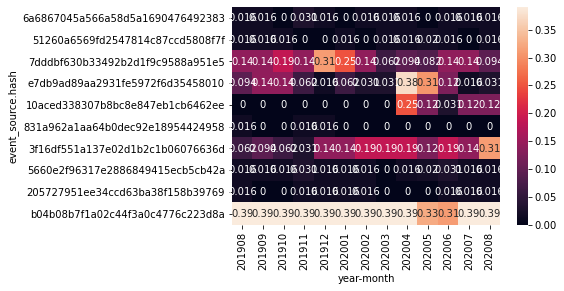

In [161]:
sns.heatmap(pivot_voice_usage_info[year_month_list].sample(n=10), annot=True)

In [162]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
event_source.hash,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.140625,0.015625,0.062500,0.031250,0.062500,0.015625,0.015625,0.031250,0.031250,0.040816,0.062500,0.062500,0.06250,0.048813
002fb47f60400713c854b0f69ff78c0a,0.062500,0.015625,0.031250,0.015625,0.062500,0.046875,0.093750,0.046875,0.093750,0.163265,0.015625,0.015625,0.03125,0.053424
00567a4a3c474aca1ce5cd6570648932,0.015625,0.000000,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.003606
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.06250,0.004808
007400db8afa996e788d23986739f3db,0.062500,0.093750,0.062500,0.062500,0.062500,0.015625,0.031250,0.000000,0.015625,0.040816,0.062500,0.000000,0.00000,0.039197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.000000,0.031250,0.062500,0.062500,0.031250,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.015625,0.00000,0.018029
ffb63ff99cf1354dff1da862f379da80,0.250000,0.390625,0.390625,0.390625,0.250000,0.390625,0.312500,0.390625,0.140625,0.326531,0.390625,0.468750,0.25000,0.334012
ffd697d66cc01c8897ce3e37d693673a,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001202


### Finding Outliers

<AxesSubplot:>

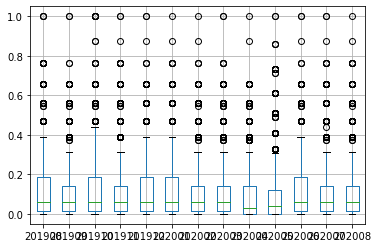

In [163]:
pivot_voice_usage_info.boxplot(column=[int(x) for x in year_month_list])

## ToDO
- outlier analysis

In [164]:
pivot_voice_usage_info.describe()

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
count,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000
mean,0.114908,0.097623,0.125436,0.106202,0.114463,0.113948,0.103817,0.110119,0.085392,0.091258,0.125064,0.112548,0.101286,0.107851
std,0.138763,0.122347,0.146255,0.130960,0.132240,0.133495,0.126028,0.127201,0.114835,0.125925,0.141051,0.135715,0.124991,0.114321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001202
25%,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.000000,0.000000,0.015625,0.015625,0.015625,0.024038
50%,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.031250,0.040816,0.062500,0.062500,0.062500,0.073685
75%,0.187500,0.140625,0.187500,0.140625,0.187500,0.187500,0.140625,0.140625,0.140625,0.122449,0.187500,0.140625,0.140625,0.152914
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
# labling usage bins
bins = [0, 0.08, 0.3,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.140625,0.015625,0.062500,0.031250,0.062500,0.015625,0.015625,0.031250,0.031250,0.040816,0.062500,0.062500,0.06250,0.048813,LOW
002fb47f60400713c854b0f69ff78c0a,0.062500,0.015625,0.031250,0.015625,0.062500,0.046875,0.093750,0.046875,0.093750,0.163265,0.015625,0.015625,0.03125,0.053424,LOW
00567a4a3c474aca1ce5cd6570648932,0.015625,0.000000,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.003606,LOW
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.06250,0.004808,LOW
007400db8afa996e788d23986739f3db,0.062500,0.093750,0.062500,0.062500,0.062500,0.015625,0.031250,0.000000,0.015625,0.040816,0.062500,0.000000,0.00000,0.039197,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.000000,0.031250,0.062500,0.062500,0.031250,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.015625,0.00000,0.018029,LOW
ffb63ff99cf1354dff1da862f379da80,0.250000,0.390625,0.390625,0.390625,0.250000,0.390625,0.312500,0.390625,0.140625,0.326531,0.390625,0.468750,0.25000,0.334012,HIGH
ffd697d66cc01c8897ce3e37d693673a,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001202,LOW


In [166]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [167]:
pivot_voice_usage_info

year-month,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,,,,
00221451f705ebe26051158bb14f567a,0.140625,0.015625,0.062500,0.031250,0.062500,0.015625,0.015625,0.031250,0.031250,0.040816,0.062500,0.062500,0.06250,0.048813,LOW
002fb47f60400713c854b0f69ff78c0a,0.062500,0.015625,0.031250,0.015625,0.062500,0.046875,0.093750,0.046875,0.093750,0.163265,0.015625,0.015625,0.03125,0.053424,LOW
00567a4a3c474aca1ce5cd6570648932,0.015625,0.000000,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.003606,LOW
00724ae2470df1ed0fe919800d02517d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.06250,0.004808,LOW
007400db8afa996e788d23986739f3db,0.062500,0.093750,0.062500,0.062500,0.062500,0.015625,0.031250,0.000000,0.015625,0.040816,0.062500,0.000000,0.00000,0.039197,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb4fa6778bc5b3d9c858f5f4fa1e0c2,0.000000,0.031250,0.062500,0.062500,0.031250,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.015625,0.00000,0.018029,LOW
ffb63ff99cf1354dff1da862f379da80,0.250000,0.390625,0.390625,0.390625,0.250000,0.390625,0.312500,0.390625,0.140625,0.326531,0.390625,0.468750,0.25000,0.334012,HIGH
ffd697d66cc01c8897ce3e37d693673a,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001202,LOW


In [168]:
pivot_voice_usage_info.to_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [169]:
# bucketing by location
voice_location_info = voice_usage_info
voice_location_info['Location_Identifier'] = voice_location_info['msan'].astype(str)+ voice_location_info['location_code'].astype(str) +voice_location_info['equp_id'].astype(str) +voice_location_info['equp_index'].astype(str)
voice_location_info

,event_source.hash,call_count,duration,year-month,account_num.hash,rtom_code,location_code,msan,equp_id,equp_index,Location_Identifier
0,90feabe2f2846cbf4eb77db650c48a1b,14,1200,201912,9c926ad1c6705e1f46462dc5b59d8feb,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
1,4c31c59c555ac6f4fdba3cec18674004,186,29616,202001,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
2,4c31c59c555ac6f4fdba3cec18674004,162,28799,202002,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
3,4c31c59c555ac6f4fdba3cec18674004,187,34830,202003,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
4,4c31c59c555ac6f4fdba3cec18674004,116,27311,202005,b0c495cfe7a57adf77d0fdadecabe3e0,R-GP,TP-NODE,C300M,870091,1,C300MTP-NODE8700911
...,...,...,...,...,...,...,...,...,...,...,...
33207,881083811a88758606701519d3f07faa,12,389,202006,c78977b555bf659a9586b15dd4f3b608,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,MSAG5200-ISLBZ-NODE435881
33208,ac8d17782113fb666dc8d8804f46ceaa,8,1560,201908,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,MSAG5200-ISLBZ-NODE435881
33209,ac8d17782113fb666dc8d8804f46ceaa,8,2100,201909,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,MSAG5200-ISLBZ-NODE435881
33210,ac8d17782113fb666dc8d8804f46ceaa,15,4020,202001,cfc0dd04946fe2779e63e51c7a3aa0c2,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,MSAG5200-ISLBZ-NODE435881


In [170]:
voice_location_info = voice_location_info.drop_duplicates("event_source.hash", keep="last")
voice_location_info.shape

(3191, 11)

In [171]:
user_location = voice_location_info[['event_source.hash','Location_Identifier']]
user_location

,event_source.hash,Location_Identifier
13,4c31c59c555ac6f4fdba3cec18674004,C300MTP-NODE8700911
26,73051c4485db78111612f2de609ef769,C300MTP-NODE8700911
39,2cacd49987694a9a2ee3b95301c47aa7,C300MTP-NODE8700911
50,b2098cfa4095b95c9bdf865a15cbf320,C300MTP-NODE8700911
60,921b3d510c7a37d94c57415b9f71a533,MSAG5200-ISLND-PHG-NODE500241
...,...,...
33173,7c3ef713055f0d38a9ff266ce65e5e30,MSAG5200-ISLBZ-NODE435881
33185,7137d1cbc03fe72dd0a32dd430b49f78,MSAG5200-ISLBZ-NODE435881
33194,91ab83caaebbc937ca30f5306e80dbad,MSAG5200-ISLBZ-NODE435881
33207,881083811a88758606701519d3f07faa,MSAG5200-ISLBZ-NODE435881


In [172]:
user_location.to_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Locations_of_Users.csv")

In [173]:
voice_location_info["User_Count"] = 1
voice_gropued_by_locations = voice_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
voice_gropued_by_locations = voice_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-173-46e54884d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_location_info["User_Count"] = 1


In [174]:
voice_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,12
1,C300MHT-NE-NODE8152461,17
2,C300MIDH-IDJ-NODE11065541,60
3,C300MKI-NODE10668164,86
4,C300MNW-MEE-NODE18887751,179
5,C300MPDT-NODE13379431,12
6,C300MTP-NODE8700911,21
7,C300MVH-NODE9874041,16
8,MA5603TAD-SRV-NODE10224991,7
9,MSAG5200-ISLBZ-NODE435881,150


In [175]:
voice_gropued_by_locations.to_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Users_by_location.csv")